In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load complete alarmlog from turbines at Bessaker
alarms = pd.read_excel('DataFromBazefield/AlarmlogBessaker.xlsx')

In [3]:
# drop certain alarms:
# alarms = alarms[alarms.Alarm != 'Status_2_Substatus_1']

In [4]:
# sort alrams based on turbine and store in a dictionary 
individual_turbine_alarm = {}

for i in range(25):
    if(i+1 < 10):
        individual_turbine_alarm[i+1] = alarms.loc[alarms['Turbine'] == 'BESS-WTG0{0}'.format(i+1)]
    else :
        individual_turbine_alarm[i+1] = alarms.loc[alarms['Turbine'] == 'BESS-WTG{0}'.format(i+1)]
    
    individual_turbine_alarm[i+1] = individual_turbine_alarm[i+1].reset_index(drop=True)

In [199]:
individual_turbine_alarm[25]

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
0,Bessaker,BESS-WTG25,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2019-10-07 08:55:08,2019-10-07 14:54:55,05:59:47,Alarm,NaN
1,Bessaker,BESS-WTG25,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-06 19:48:59,2019-10-06 20:46:07,00:57:08,Alarm,NaN
2,Bessaker,BESS-WTG25,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-06 12:24:37,2019-10-06 12:42:28,00:17:51,Alarm,NaN
3,Bessaker,BESS-WTG25,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-02 19:08:16,2019-10-02 19:24:44,00:16:28,Alarm,NaN
4,Bessaker,BESS-WTG25,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),2019-10-02 12:26:37,2019-10-02 12:26:44,00:00:07,Alarm,NaN
5,Bessaker,BESS-WTG25,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),2019-10-02 12:24:29,2019-10-02 12:26:37,00:02:08,Alarm,NaN
6,Bessaker,BESS-WTG25,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-10-02 05:08:40,2019-10-02 05:43:55,00:35:15,Alarm,NaN
7,Bessaker,BESS-WTG25,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2019-09-30 14:22:32,2019-09-30 14:42:05,00:19:33,Alarm,NaN
8,Bessaker,BESS-WTG25,Status_240_Substatus_0,240:0,A,R 240:0 STATUS: Remote control PC (switched on),2019-09-30 14:22:25,2019-09-30 14:22:32,00:00:07,Alarm,NaN
9,Bessaker,BESS-WTG25,Status_240_Substatus_1,240:1,A,R 240:1 STATUS: Remote control PC (switched off),2019-09-30 14:20:14,2019-09-30 14:22:25,00:02:11,Alarm,NaN


In [241]:
# Parsing time:
def get_time_duration(alarm_1, alarm_2):
    end_of_alarm_1 = alarm_1.End
    start_of_alarm_2 = alarm_2.Start
    duration = start_of_alarm_2 - end_of_alarm_1
    duration_mins = duration/np.timedelta64(1, 'm')
    duration_hrs = duration/np.timedelta64(1, 'h')
    duration_days = duration/np.timedelta64(1, 'D')

    #print('Difference between start and end in minutes: {0}'.format(duration_mins))
    #print('Difference between start and end in hours: {0}'.format(duration_hrs))
    #print('Difference between start and end in days: {0}'.format(duration_days))
    return duration_hrs

get_time_duration(individual_turbine_alarm[1].iloc[1], individual_turbine_alarm[1].iloc[0])

98.49722222222222

In [318]:
a = [1,2,3]
b = [1,2,3,4]
c = []
c.append(a)
c.append(b)
print(c[0])

[1, 2, 3]


In [444]:
#REMEBER: the dataset has the latest alarms on top

def groupConsecutiveErrors(turbine_data, hour_limit):
    all_consecutive_errors = []
    all_consecutive_error_alarms = []

    test_sample = turbine_data
    current_alarm_count = test_sample.shape[0]-1

    for i in reversed(range(test_sample.shape[0])):
    #for i in reversed(range(individual_alarm[1].shape[0])):

        build_array = True

        if(current_alarm_count >= i):

            new_alarm_count = i-1
            root_alarm = test_sample.iloc[current_alarm_count]

            # Create a list with following alarms
            whole_consecutive_alarms = []
            whole_consecutive_alarms.append(root_alarm)

            consecutive_alarms = []
            consecutive_alarms.append(root_alarm.Alarm)

            while(build_array == True and new_alarm_count >= 0):
                current_alarm = test_sample.iloc[i]
                new_alarm = test_sample.iloc[new_alarm_count]
                duration_hrs = get_time_duration(current_alarm, new_alarm)

                if(duration_hrs < hour_limit):
                    whole_consecutive_alarms.append(new_alarm)
                    consecutive_alarms.append(new_alarm.Alarm)
                    current_alarm_count = current_alarm_count - 1
                    new_alarm_count = new_alarm_count - 1
                else:
                    build_array = False
                    if(len(consecutive_alarms) > 1):
                        all_consecutive_errors.append(whole_consecutive_alarms)
                        all_consecutive_error_alarms.append(consecutive_alarms)
                        
    return all_consecutive_errors,all_consecutive_error_alarms


def printLog(error_list):      
    # Print the consecutive alarms
    print(len(error_list))
    for i in range(len(error_list)):
        print('\nList {0} begins {1} and contains the following alarms: '
              .format(i, error_list[i][0].Start))
        for j in range(len(error_list[i])):
            print('Alarm: {} \tStarted: {} \tEnded{}'.format(error_list[i][j].Alarm, 
                                                           error_list[i][j].Start, 
                                                           error_list[i][j].End))

def simplePrintLog(error_list):
    # Print the consecutive alarms
    print(len(error_list))
    for i in range(len(error_list)):
        print('\nList {0} contains the following alarms: '.format(i))
        for j in range(len(error_list[i])):
            print('Alarm: {}'.format(error_list[i][j]))

In [460]:
whole_alarm_list, simle_alarm_list = groupConsecutiveErrors(individual_turbine_alarm[25], 2)


In [461]:
printLog(whole_alarm_list)
simplePrintLog(simle_alarm_list)

425

List 0 begins 2017-08-27 16:17:35 and contains the following alarms: 
Alarm: Status_21_Substatus_2 	Started: 2017-08-27 16:17:35 	Ended2017-08-27 16:55:41
Alarm: Status_2_Substatus_1 	Started: 2017-08-27 16:55:41 	Ended2017-08-27 17:14:14

List 1 begins 2017-08-27 16:55:41 and contains the following alarms: 
Alarm: Status_2_Substatus_1 	Started: 2017-08-27 16:55:41 	Ended2017-08-27 17:14:14
Alarm: Status_300_Substatus_81 	Started: 2017-08-29 10:38:04 	Ended2017-08-29 10:38:05
Alarm: Status_304_Substatus_17 	Started: 2017-08-29 10:38:05 	Ended2017-08-30 09:07:51

List 2 begins 2017-08-29 10:37:59 and contains the following alarms: 
Alarm: Status_304_Substatus_17 	Started: 2017-08-29 10:37:59 	Ended2017-08-29 10:38:04
Alarm: Status_304_Substatus_17 	Started: 2017-08-29 10:38:05 	Ended2017-08-30 09:07:51

List 3 begins 2017-08-29 10:38:04 and contains the following alarms: 
Alarm: Status_300_Substatus_81 	Started: 2017-08-29 10:38:04 	Ended2017-08-29 10:38:05
Alarm: Status_8_Substatu

Alarm: Status_2_Substatus_1

List 92 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 93 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 94 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 95 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 96 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 97 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 98 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 99 contains the following alarms: 
Alarm: Status_2_Substatus_1
Alarm: Status_2_Substatus_1

List 100 contains the following alarms: 
Alarm: Status_2_Substatus_2
Alarm: Status_2_Substatus_1

List 101 cont

In [471]:
def countSameLog(simle_alarm_log):
    repeated_log = {}
    for i in range(len(simle_alarm_log)):
        name = ''
        for alarm in simle_alarm_log[i]:
            name = '{0}{1} '.format(name, alarm)
        
        number_of_repetition = simle_alarm_log.count(simle_alarm_log[i])
        if(number_of_repetition > 1):
            repeated_log[name] = number_of_repetition
            
    sorted_repeated_log = sorted(repeated_log.items(), key=lambda kv: kv[1], reverse=True)

    print('Occurrence\tAlarms')
    for j in range(len(sorted_repeated_log)):
        print('{}\t{}'.format(sorted_repeated_log[j][1], sorted_repeated_log[j][0]))
    return(sorted_repeated_log)

def visualizeCount(sorted_alarm_log):
    labels = []
    occurrance = []
    for i in range(len(sorted_alarm_log)):
        occurrance.append(sorted_alarm_log[i][0])
        labels.append(i)
    x = np.arange(len(labels))
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, occurrance)
    ax.set_ylabel('Occurances')
    ax.set_title('Occurrances of Fault Series')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    
    plt.show()
    

IndentationError: expected an indented block (<ipython-input-471-12100e08ed0d>, line 35)

No handles with labels found to put in legend.


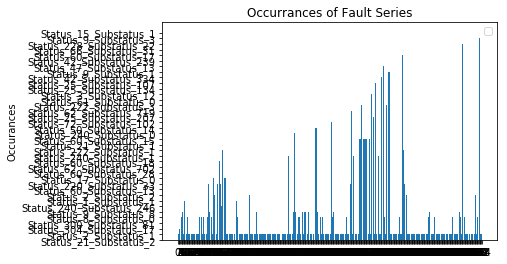

In [469]:
visualizeCount(simle_alarm_list)

In [463]:
repeated_log = countSameLog(simle_alarm_list)

Occurrence	Alarms
114	Status_2_Substatus_1 Status_2_Substatus_1 
24	Status_2_Substatus_1 Status_2_Substatus_1 Status_2_Substatus_1 
15	Status_8_Substatus_0 Status_2_Substatus_1 
12	Status_2_Substatus_1 Status_9_Substatus_8 
9	Status_2_Substatus_1 Status_8_Substatus_0 
8	Status_9_Substatus_8 Status_2_Substatus_1 
7	Status_2_Substatus_1 Status_21_Substatus_2 Status_2_Substatus_1 
7	Status_2_Substatus_1 Status_240_Substatus_0 
6	Status_21_Substatus_2 Status_2_Substatus_1 
4	Status_2_Substatus_1 Status_9_Substatus_3 
3	Status_8_Substatus_0 Status_9_Substatus_8 
3	Status_1_Substatus_1 Status_2_Substatus_1 
3	Status_2_Substatus_2 Status_2_Substatus_1 
3	Status_2_Substatus_1 Status_21_Substatus_1 Status_2_Substatus_1 
3	Status_2_Substatus_1 Status_60_Substatus_15 
3	Status_2_Substatus_1 Status_2_Substatus_1 Status_9_Substatus_8 
3	Status_2_Substatus_1 Status_8_Substatus_0 Status_8_Substatus_0 
3	Status_2_Substatus_1 Status_2_Substatus_1 Status_9_Substatus_8 Status_2_Substatus_1 Status_9_Subst

Status_240_Substatus_1
Status_240_Substatus_0
Status_2_Substatus_1
